In [3]:
import sys

#----TURN THESE ON IF RUNNING ON JOVE ON OWN LAPTOP BY REMOVING THE ''' ... '''

sys.path[0:0] = ['../../../..', '../../../../3rdparty',
                 '../../..','../../../3rdparty',
                 '../..','../../3rdparty'] 

from jove.DotBashers import *
from jove.Def_md2mc import *
from jove.Def_DFA   import *
from jove.Def_NFA   import *
from jove.LangDef   import *
from jove.JoveEditor import *
from jove.Def_RE2NFA import *
from jove.Def_NFA2RE import *

#----TURN THESE ON IF RUNNING ON JOVE ON COLAB BY REMOVING THE ''' ... '''

'''
! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
import sys
sys.path.append('./Jove')
sys.path.append('./Jove/jove')

from jove.DotBashers import *
from jove.Def_md2mc import *
from jove.Def_DFA   import *
from jove.Def_NFA   import *
from jove.LangDef   import *
from jove.JoveEditor import *
from jove.Def_RE2NFA import *
from jove.Def_NFA2RE import *
'''

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)

You may use any of these help commands:
help(mk_nfa)
help(totalize_nfa)
help(step_nfa)
help(run_nfa)
help(ec_step_nfa)
help(Eclosure)
help(Echelp)
help(accept

"\n! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi\nimport sys\nsys.path.append('./Jove')\nsys.path.append('./Jove/jove')\n\nfrom jove.DotBashers import *\nfrom jove.Def_md2mc import *\nfrom jove.Def_DFA   import *\nfrom jove.Def_NFA   import *\nfrom jove.LangDef   import *\nfrom jove.JoveEditor import *\nfrom jove.Def_RE2NFA import *\nfrom jove.Def_NFA2RE import *\n"

 # The DFA Solution below in the code cell below.

Generating LALR tables


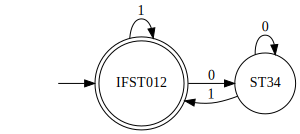

In [4]:
# code for the DFA problem
min_dfa_drawn = md2mc('''DFA
IFST012 : 0 -> ST34
IFST012 : 1 -> IFST012
ST34 : 0 -> ST34
ST34 : 1 -> IFST012
''')

dotObj_dfa_w_bh(min_dfa_drawn)

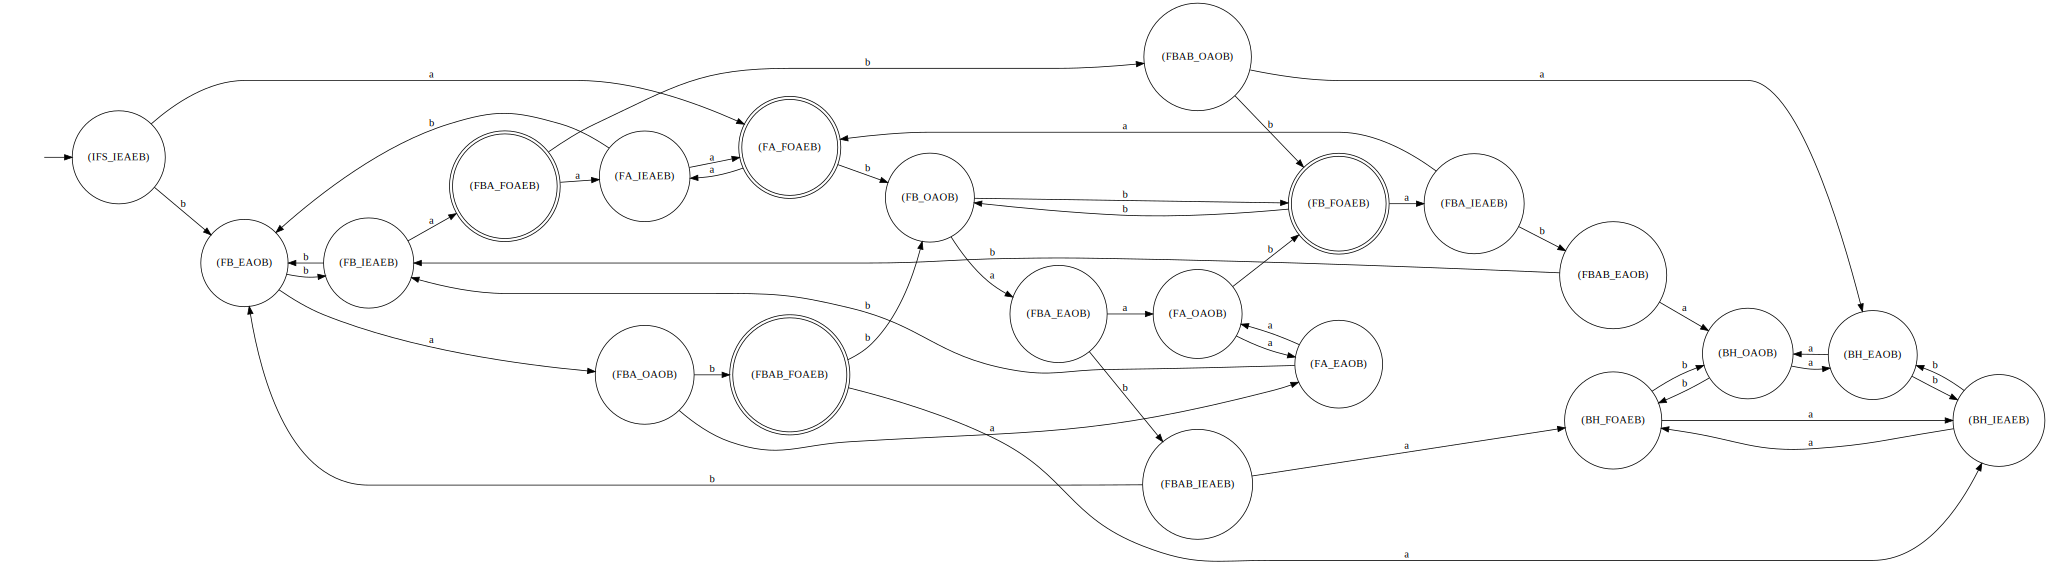

In [24]:
dfa_oddas_evenbs = md2mc('''DFA
    IEAEB : a -> FOAEB
    IEAEB : b -> EAOB
    FOAEB : a -> IEAEB
    FOAEB : b -> OAOB
    EAOB : a -> OAOB
    EAOB : b -> IEAEB
    OAOB : a -> EAOB
    OAOB : b -> FOAEB
''')

dfa_no_babastring = md2mc('''DFA
    IFS : b -> FB
    IFS : a -> FA
    FB : a -> FBA
    FB : b -> FB
    FA : a -> FA
    FA : b -> FB
    FBA : a -> FA
    FBA : b -> FBAB
    FBAB : a -> BH
    FBAB : b -> FB
    BH : a | b -> BH
''')

full_dfa = intersect_dfa(dfa_no_babastring, dfa_oddas_evenbs)

dotObj_dfa_w_bh(full_dfa)

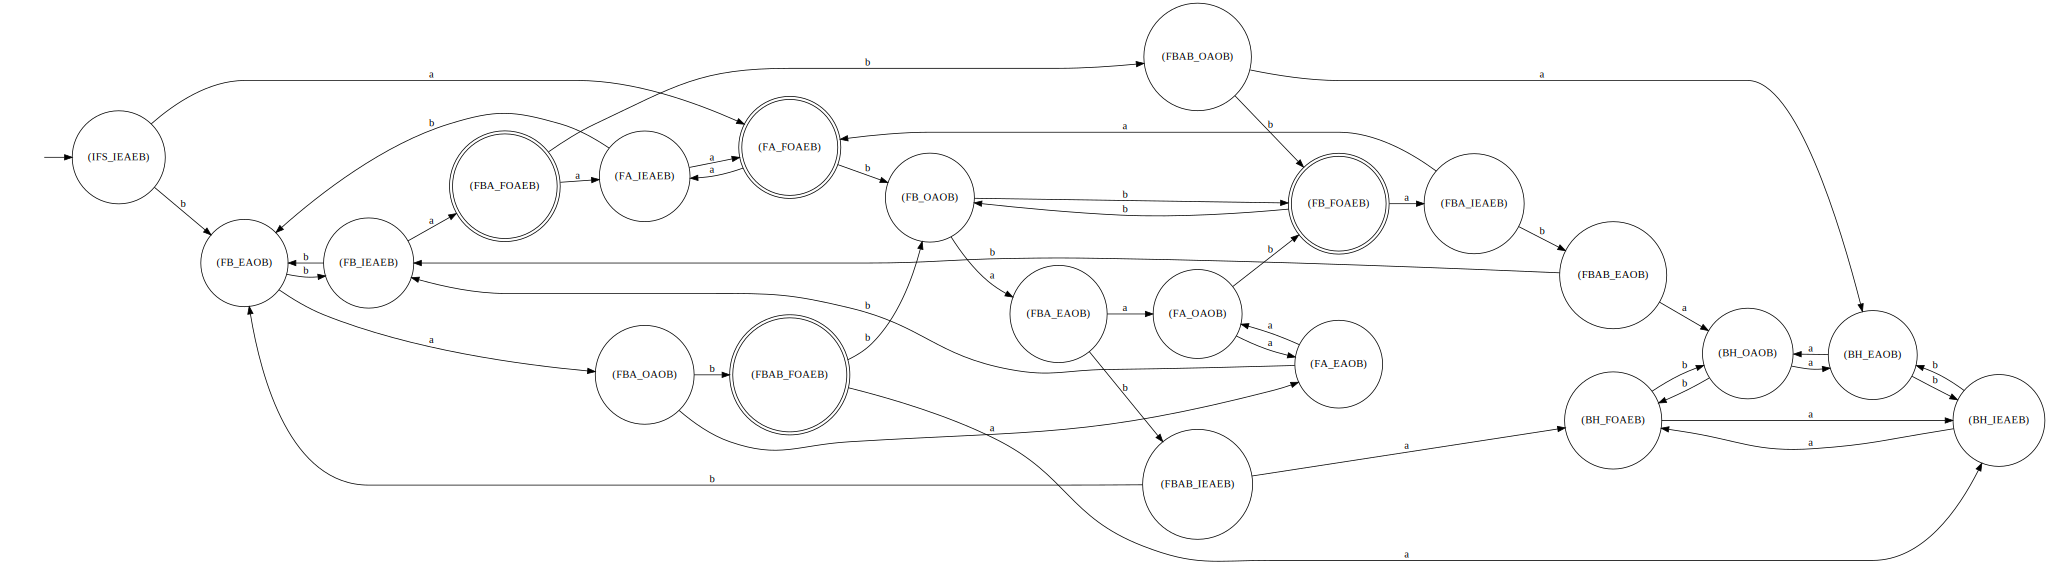

In [24]:
dfa_oddas_evenbs = md2mc('''DFA
    IEAEB : a -> FOAEB
    IEAEB : b -> EAOB
    FOAEB : a -> IEAEB
    FOAEB : b -> OAOB
    EAOB : a -> OAOB
    EAOB : b -> IEAEB
    OAOB : a -> EAOB
    OAOB : b -> FOAEB
''')

dfa_no_babastring = md2mc('''DFA
    IFS : b -> FB
    IFS : a -> FA
    FB : a -> FBA
    FB : b -> FB
    FA : a -> FA
    FA : b -> FB
    FBA : a -> FA
    FBA : b -> FBAB
    FBAB : a -> BH
    FBAB : b -> FB
    BH : a | b -> BH
''')

full_dfa = intersect_dfa(dfa_no_babastring, dfa_oddas_evenbs)

dotObj_dfa_w_bh(full_dfa)

In [31]:
min_full_dfa = min_dfa(full_dfa)

langeq_dfa(full_dfa, min_full_dfa, True)

True

In [32]:
iso_dfa(full_dfa, min_full_dfa)

False

In [28]:
test_language = {s for s in lstar({'a', 'b'}, 6)}

for s in test_language:
    if s == '':
        print('Empty string? ', end='')
    else:
        print(s, end='? ')
        
    print(accepts_dfa(full_dfa, s))


Empty string? False
baabab? False
baabbb? False
bbabb? True
babbbb? False
aab? False
baabba? False
aabbaa? False
abbbb? True
bbbabb? False
aaabbb? False
bbaab? False
baaba? True
ababba? False
abbaaa? False
bbbaaa? False
bbbbbb? False
bab? True
ababa? False
bababb? False
baaaa? False
bbaaba? False
babbab? False
aa? False
ababaa? False
abaaab? False
bbabaa? False
aaba? False
aba? False
aabb? False
aabba? True
baab? False
aaabba? False
baabaa? False
baa? False
aaab? False
bbb? False
ababbb? False
babbb? True
aabbbb? False
aaaaab? False
ababb? False
abaa? False
abbb? False
bbbaab? False
bbabab? False
abbaa? True
baaaaa? False
ba? False
aabbba? False
babab? False
bbaa? False
aababa? False
aaaa? False
bbbbab? False
bba? True
aaaaaa? False
bbba? False
bbaaa? True
abbbaa? False
abbaba? False
aaabaa? False
bbbbaa? False
abbabb? False
bbaaaa? False
bbabba? False
bbaba? False
bbab? False
aaabab? False
babaa? False
bbbaba? False
bbabbb? False
aabaaa? False
abaaa? False
babba? False
babaaa? False
b

Generating LALR tables


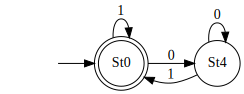

In [14]:
unmindfa = nfa2dfa(re2nfa('(00*1+1)*'))

dotObj_dfa(min_dfa(unmindfa))

 # The NFA Solution below in the code cell below.

In [12]:
iso_dfa(min_dfa_drawn, mindfa)

True

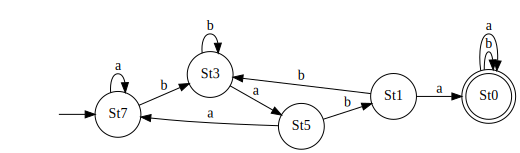

In [38]:
nfa_baba = md2mc('''NFA
    IS : a -> IS
    IS : b -> B, IS
    B : a -> BA
    BA : b -> BAB
    BAB : a -> FSBABA
    FSBABA : a | b -> FSBABA
''')

dfa_baba = nfa2dfa(nfa_baba)
dfa_baba = min_dfa(dfa_baba)

dotObj_dfa(dfa_baba)


